<a href="https://colab.research.google.com/github/Kashish-28/Visualization-of-Indian-unicorns/blob/main/visualisation_of_indian_unicorns_python_projectipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Import the required python libraries

#Preprocessing of data
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler as ss

#Visualization of data
import plotly.express as px
from plotly.subplots import make_subplots
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.graph_objects as go

In [ ]:
#Reading the dataset

df = pd.read_csv('/content/Indian Unicorns Dataset.csv')
#Displaying the dataframe
df

,S No.,Unicorns,Segment,Valuation ($ Bn),FY21 P/L (Cr),FY20 P/L (Cr),FY21 Op Revenue (Cr),FY21 Expenses (Cr),FY21 EBITDA Margin,FY21 Exp/Op Revenue,Total Funding ($ Mn),Head Count,Founded In,Unicorn In,Unicorn Age,Current Status,Headquarters,Founders,Key Investors
0,1,Acko,Fintech,1.1,-132.5,-188.0,209.0,341.5,-53.44%,1.63,458,775.0,2017,2021.0,4.0,Active,Mumbai,"Varun Dua, Ruchi Deepak","General Atlantic, Lightspeed Venture Partners,..."
1,2,Amagi,SaaS,1.0,20.7,-18.7,219.3,198.0,12.70%,0.90,240,497.0,2008,2022.0,14.0,Active,Bengaluru,"Baskar Subramanian, Srinivasan KA, Srividhya S...","Accel, Norwest Venture Partners, PremjiInvest"
2,3,Apna,HR Tech,1.1,-28.3,0.3,17.0,45.4,-161.75%,2.67,194,645.0,2019,2021.0,2.0,Active,Bengaluru,Nimrit Parikh,"Sequoia Capital, Tiger Global, Lightspeed Indi..."
3,4,Bharatpe,Fintech,2.9,-277.0,-207.0,119.1,462.0,-141.01%,3.88,701,1490.0,2018,2021.0,3.0,Active,Delhi NCR,"Ashneer Grover, Shashvat Nakrani","Alteria Capital, BEENEXT, Coatue, InnoVen Capi..."
4,5,BigBasket,Grocery,1.8,-600.0,-1035.0,12595.0,13257.0,-2.88%,1.05,"1,060",6919.0,2011,2019.0,8.0,Acquired,Bengaluru,"VS Sudhakar, Hari Menon, Vipul Parekh, VS Rame...","Alibaba Group, Helion Venture Partners, Paytm ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,99,Zerodha,Fintech,2.0,1122.0,424.0,2729.0,1260.0,54.47%,0.46,NaN,1664.0,2010,2020.0,10.0,Boostrapped,Bengaluru,"Nithin Kamath, Nikhil Kamath, Kailash Nadh",NaN
99,100,Zeta,Fintech,1.5,NaN,NaN,NaN,NaN,NaN,NaN,340,1379.0,2015,2021.0,6.0,Active,Bengaluru,"Bhavin Turakhia, Ramki Gaddipati",Sodexo
100,101,Zetwerk,Manufacturing,2.5,-41.2,-29.1,835.5,909.0,-1.17%,1.09,650,832.0,2018,2021.0,3.0,Active,Bengaluru,"Amrit Acharya, Srinath Ramakkrushnan, Vishal C...","D2 Capital Partners, Greenoaks Capital, InnoVe..."
101,102,Zoho,SaaS,1.0,1917.0,801.0,5230.0,3024.0,50.90%,0.58,NaN,12272.0,1996,NaN,NaN,Bootstrapped,Chennai,"Sridhar Vembu, Sreenivas Kanumuru, Tony Thomas",NaN


In [ ]:
#Checking the column/attribute names

df.columns

Index(['S No.', 'Unicorns', 'Segment', 'Valuation ($ Bn)', 'FY21 P/L (Cr)',
       'FY20 P/L (Cr)', 'FY21 Op Revenue (Cr)', 'FY21 Expenses (Cr)',
       'FY21 EBITDA Margin', 'FY21 Exp/Op Revenue', 'Total Funding ($ Mn)',
       'Head Count', 'Founded In', 'Unicorn In', 'Unicorn Age',
       'Current Status', 'Headquarters', 'Founders', 'Key Investors'],
      dtype='object')

In [ ]:
# dropping sno. column
df = df.drop(["S No."], axis = 1)

In [ ]:
#dropping all the null values from data set
df.dropna()
df

,Unicorns,Segment,Valuation ($ Bn),FY21 P/L (Cr),FY20 P/L (Cr),FY21 Op Revenue (Cr),FY21 Expenses (Cr),FY21 EBITDA Margin,FY21 Exp/Op Revenue,Total Funding ($ Mn),Head Count,Founded In,Unicorn In,Unicorn Age,Current Status,Headquarters,Founders,Key Investors
0,Acko,Fintech,1.1,-132.5,-188.0,209.0,341.5,-53.44%,1.63,458,775.0,2017,2021.0,4.0,Active,Mumbai,"Varun Dua, Ruchi Deepak","General Atlantic, Lightspeed Venture Partners,..."
1,Amagi,SaaS,1.0,20.7,-18.7,219.3,198.0,12.70%,0.90,240,497.0,2008,2022.0,14.0,Active,Bengaluru,"Baskar Subramanian, Srinivasan KA, Srividhya S...","Accel, Norwest Venture Partners, PremjiInvest"
2,Apna,HR Tech,1.1,-28.3,0.3,17.0,45.4,-161.75%,2.67,194,645.0,2019,2021.0,2.0,Active,Bengaluru,Nimrit Parikh,"Sequoia Capital, Tiger Global, Lightspeed Indi..."
3,Bharatpe,Fintech,2.9,-277.0,-207.0,119.1,462.0,-141.01%,3.88,701,1490.0,2018,2021.0,3.0,Active,Delhi NCR,"Ashneer Grover, Shashvat Nakrani","Alteria Capital, BEENEXT, Coatue, InnoVen Capi..."
4,BigBasket,Grocery,1.8,-600.0,-1035.0,12595.0,13257.0,-2.88%,1.05,"1,060",6919.0,2011,2019.0,8.0,Acquired,Bengaluru,"VS Sudhakar, Hari Menon, Vipul Parekh, VS Rame...","Alibaba Group, Helion Venture Partners, Paytm ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,Zerodha,Fintech,2.0,1122.0,424.0,2729.0,1260.0,54.47%,0.46,NaN,1664.0,2010,2020.0,10.0,Boostrapped,Bengaluru,"Nithin Kamath, Nikhil Kamath, Kailash Nadh",NaN
99,Zeta,Fintech,1.5,NaN,NaN,NaN,NaN,NaN,NaN,340,1379.0,2015,2021.0,6.0,Active,Bengaluru,"Bhavin Turakhia, Ramki Gaddipati",Sodexo
100,Zetwerk,Manufacturing,2.5,-41.2,-29.1,835.5,909.0,-1.17%,1.09,650,832.0,2018,2021.0,3.0,Active,Bengaluru,"Amrit Acharya, Srinath Ramakkrushnan, Vishal C...","D2 Capital Partners, Greenoaks Capital, InnoVe..."
101,Zoho,SaaS,1.0,1917.0,801.0,5230.0,3024.0,50.90%,0.58,NaN,12272.0,1996,NaN,NaN,Bootstrapped,Chennai,"Sridhar Vembu, Sreenivas Kanumuru, Tony Thomas",NaN


In [ ]:
#Checking the column/attribute names

df.columns

Index(['Unicorns', 'Segment', 'Valuation ($ Bn)', 'FY21 P/L (Cr)',
       'FY20 P/L (Cr)', 'FY21 Op Revenue (Cr)', 'FY21 Expenses (Cr)',
       'FY21 EBITDA Margin', 'FY21 Exp/Op Revenue', 'Total Funding ($ Mn)',
       'Head Count', 'Founded In', 'Unicorn In', 'Unicorn Age',
       'Current Status', 'Headquarters', 'Founders', 'Key Investors'],
      dtype='object')

In [ ]:
#Checking the shape of the dataframe

df.shape

(103, 18)

In [ ]:
#Check the information and display it

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unicorns              103 non-null    object 
 1   Segment               103 non-null    object 
 2   Valuation ($ Bn)      102 non-null    object 
 3   FY21 P/L (Cr)         86 non-null     object 
 4   FY20 P/L (Cr)         86 non-null     object 
 5   FY21 Op Revenue (Cr)  73 non-null     float64
 6   FY21 Expenses (Cr)    73 non-null     float64
 7   FY21 EBITDA Margin    67 non-null     object 
 8   FY21 Exp/Op Revenue   71 non-null     float64
 9   Total Funding ($ Mn)  98 non-null     object 
 10  Head Count            102 non-null    float64
 11  Founded In            103 non-null    int64  
 12  Unicorn In            100 non-null    float64
 13  Unicorn Age           99 non-null     float64
 14  Current Status        103 non-null    object 
 15  Headquarters          1

In [ ]:
# Display the first 15 rows of the dataframe

df.head(15)

,Unicorns,Segment,Valuation ($ Bn),FY21 P/L (Cr),FY20 P/L (Cr),FY21 Op Revenue (Cr),FY21 Expenses (Cr),FY21 EBITDA Margin,FY21 Exp/Op Revenue,Total Funding ($ Mn),Head Count,Founded In,Unicorn In,Unicorn Age,Current Status,Headquarters,Founders,Key Investors
0,Acko,Fintech,1.1,-132.5,-188.0,209.00,341.50,-53.44%,1.63,458,775.0,2017,2021.0,4.0,Active,Mumbai,"Varun Dua, Ruchi Deepak","General Atlantic, Lightspeed Venture Partners,..."
1,Amagi,SaaS,1.0,20.7,-18.7,219.30,198.00,12.70%,0.90,240,497.0,2008,2022.0,14.0,Active,Bengaluru,"Baskar Subramanian, Srinivasan KA, Srividhya S...","Accel, Norwest Venture Partners, PremjiInvest"
2,Apna,HR Tech,1.1,-28.3,0.3,17.00,45.40,-161.75%,2.67,194,645.0,2019,2021.0,2.0,Active,Bengaluru,Nimrit Parikh,"Sequoia Capital, Tiger Global, Lightspeed Indi..."
3,Bharatpe,Fintech,2.9,-277.0,-207.0,119.10,462.00,-141.01%,3.88,701,1490.0,2018,2021.0,3.0,Active,Delhi NCR,"Ashneer Grover, Shashvat Nakrani","Alteria Capital, BEENEXT, Coatue, InnoVen Capi..."
4,BigBasket,Grocery,1.8,-600.0,-1035.0,12595.00,13257.00,-2.88%,1.05,"1,060",6919.0,2011,2019.0,8.0,Acquired,Bengaluru,"VS Sudhakar, Hari Menon, Vipul Parekh, VS Rame...","Alibaba Group, Helion Venture Partners, Paytm ..."
5,Billdesk,Fintech,2.5,246.0,211.0,2124.00,1880.00,16.79%,0.89,241,486.0,2000,2018.0,18.0,Acquired,Mumbai,"Ajay Kaushal,Karthik Ganapathy, Srinivasu Mn","Clearstone Venture Partners, State Bank of Ind..."
6,BlackBuck,Logistics,1.0,-241.4,-452.4,866.70,1134.60,-19.90%,1.31,364,2418.0,2015,2021.0,6.0,Active,Bengaluru,"Chanakya Hridaya, Rajesh Yabaji, Ramasubramani...","Accel, Goldman Sachs, IFC Asset Management Com..."
7,Blinkit,Grocery,1.0,-558.0,-916.0,2725.00,3299.00,-16.48%,1.21,"1,000",5562.0,2013,2021.0,8.0,Active,Delhi NCR,"Albinder Dhindsa, Saurabh Kumar","Tiger Global Management, Sequoia Capital India..."
8,BrowserStack,SaaS,4.0,NaN,27.8,NaN,NaN,NaN,NaN,250,1023.0,2011,2021.0,10.0,Active,Mumbai,"Nakul Aggarwal, Ritesh Arora","Accel, Bond Capital"
9,Byju's,Edtech,22.0,Not Filed,-262.0,NaN,NaN,NaN,NaN,"5,300",39953.0,2008,2018.0,10.0,Active,Bengaluru,"Divya Gokulnath,Byju Raveendran","Tiger Global Management, Tencent, Sequoia Capi..."


In [ ]:
# Display the last 15 rows of the dataframe

df.tail(15)

,Unicorns,Segment,Valuation ($ Bn),FY21 P/L (Cr),FY20 P/L (Cr),FY21 Op Revenue (Cr),FY21 Expenses (Cr),FY21 EBITDA Margin,FY21 Exp/Op Revenue,Total Funding ($ Mn),Head Count,Founded In,Unicorn In,Unicorn Age,Current Status,Headquarters,Founders,Key Investors
88,Swiggy,Foodtech,10.0,-1617.0,-3920.0,2547.0,4139.4,-49.24%,1.63,"4,800",18459.0,2014,2018.0,4.0,Active,Bengaluru,"Nandan Reddy, Rahul Jaimini, Sriharsha Majety","Accel, Amansa Holdings, Bessemer Venture Partn..."
89,Udaan,Ecommerce,3.1,-2482.0,-2519.0,5919.0,8742.0,-37.31%,1.48,"1,500",11512.0,2016,2018.0,2.0,Active,Bengaluru,"Sujeet Kumar, Amod Malviya, Vaibhav Gupta","Lightspeed Venture Partners, GGV Capital, Tenc..."
90,Unacademy,Edtech,3.4,-1537.0,-258.7,398.0,2030.0,-320.32%,5.10,849,8226.0,2015,2020.0,5.0,Active,Bengaluru,"Gaurav Munjal, Hemesh Singh, Roman Saini, Sach...","Ashish Tulsian, Blume Ventures, Dragoneer Inve..."
91,Uniphore,Conversational platform,2.5,NaN,NaN,NaN,NaN,NaN,NaN,621,755.0,2008,2022.0,14.0,Active,Chennai,"Ravi Saraogi, Umesh Sachdev","Chiratae Ventures, March Capital, New Enterpri..."
92,upGrad,Edtech,1.2,-211.0,-79.0,302.0,513.7,-63.46%,1.70,352,3706.0,2015,2021.0,6.0,Active,Mumbai,"Ronnie Screwvala, Mayank Kumar, Phalgun Kompal...","IIFL Asset Mangement, International Finance Co..."
93,Upstox,Fintech,3.4,-71.6,-38.0,385.6,497.3,-14.68%,1.29,NaN,1425.0,2010,2021.0,1.0,Active,Mumbai,"Raghu Kumar, Ravi Kumar, Shrinivas Viswanath",Tiger Global Management
94,Urban Company,Home service marketplace,2.8,-249.0,-155.0,247.7,539.0,-73.82%,2.18,446,2988.0,2014,2021.0,7.0,Active,Delhi NCR,"Abhiraj Singh Bhal, Raghav Chandra, Varun Khaitan","Bessemer Venture Partners, Tiger Global Manage..."
95,Vedantu,Edtech,1.0,Not Filed,-27.3,NaN,NaN,NaN,NaN,293,5297.0,2011,2021.0,10.0,Active,Bengaluru,"Anand Prakash, Pulkit Jain, Saurabh Saxena, Va...","Accel India, GGV Capital, Tiger Global Management"
96,Xpressbees,Logistics,1.2,-65.5,-102.7,1005.0,1085.0,-4.79%,1.08,578,3454.0,2012,2022.0,10.0,Active,Pune,"Amitava Saha, Supam Maheshwari","Norwest Venture Partners, InnoVen Capital, TPG..."
97,Zenoti,SaaS,1.5,NaN,NaN,NaN,NaN,NaN,NaN,331,855.0,2010,2020.0,10.0,Active,Hyderabad,"Sudheer Koneru, Dheeraj Koneru","Advent International, Tiger Global Management,..."


In [ ]:
#Display the datatypes of all the columns(attributes) of the dataframe

df.dtypes

Unicorns                 object
Segment                  object
Valuation ($ Bn)         object
FY21 P/L (Cr)            object
FY20 P/L (Cr)            object
FY21 Op Revenue (Cr)    float64
FY21 Expenses (Cr)      float64
FY21 EBITDA Margin       object
FY21 Exp/Op Revenue     float64
Total Funding ($ Mn)     object
Head Count              float64
Founded In                int64
Unicorn In              float64
Unicorn Age             float64
Current Status           object
Headquarters             object
Founders                 object
Key Investors            object
dtype: object

In [ ]:
#Dispalying the sum of the null values in each column(attribute)

df.isnull().sum()

Unicorns                 0
Valuation ($ Bn)         1
FY21 P/L (Cr)           17
FY20 P/L (Cr)           17
FY21 Op Revenue (Cr)    30
FY21 Expenses (Cr)      30
FY21 EBITDA Margin      36
FY21 Exp/Op Revenue     32
Total Funding ($ Mn)     5
Head Count               1
Founded In               0
Unicorn In               3
Unicorn Age              4
dtype: int64

In [ ]:
#getting mean values for all
df.mean()

<ipython-input-15-77ae2a11a7d4>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.mean()


FY21 Op Revenue (Cr)    1849.755616
FY21 Expenses (Cr)      2220.769452
FY21 Exp/Op Revenue        6.935634
Head Count              3848.774510
Founded In              2011.844660
Unicorn In              2019.960000
Unicorn Age                7.083838
dtype: float64

In [ ]:
#for obtaining max values
df.max()

<ipython-input-16-847b6ffb093e>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.max()


Unicorns                                                      upGrad
Segment                                      Vernacular social media
FY21 Op Revenue (Cr)                                         42941.7
FY21 Expenses (Cr)                                           45801.0
FY21 Exp/Op Revenue                                            331.4
Head Count                                                   55034.0
Founded In                                                      2021
Unicorn In                                                    2022.0
Unicorn Age                                                     22.0
Current Status                                                Public
Headquarters                                                    Pune
Founders                Yashish Dahiya, Avaneesh Nirjar, Alok Bansal
dtype: object

In [ ]:
#for obtaining min values
df.min()

<ipython-input-17-502021d83030>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.min()


Unicorns                                           Acko
Segment                                          Adtech
FY21 Op Revenue (Cr)                               0.86
FY21 Expenses (Cr)                                15.51
FY21 Exp/Op Revenue                                0.46
Head Count                                        113.0
Founded In                                         1984
Unicorn In                                       2012.0
Unicorn Age                                         0.6
Current Status                                 Acquired
Headquarters                                  Bengaluru
Founders                Aaditya Sharda, Souvik Sengupta
dtype: object

In [ ]:
df.rename(columns={"Valuation ($ Bn)":"valuation", "FY21 P/L (Cr)":"FY21", "FY20 P/L (Cr)":"FY20", "FY21 Op Revenue (Cr)":"revenue_op_20", "FY21 Expenses (Cr)":"expenses_21"},inplace=True)
df.rename(columns={"FY21 EBITDA Margin":"margin_21", "FY21 Exp/Op Revenue":"exp/op_revenue_21", "Total Funding ($ Mn)":"total_funding"},inplace=True)
df

,Unicorns,Segment,valuation,FY21,FY20,revenue_op_20,expenses_21,margin_21,exp/op_revenue_21,total_funding,Head Count,Founded In,Unicorn In,Unicorn Age,Current Status,Headquarters,Founders,Key Investors
0,Acko,Fintech,1.1,-132.5,-188.0,209.0,341.5,-53.44%,1.63,458,775.0,2017,2021.0,4.0,Active,Mumbai,"Varun Dua, Ruchi Deepak","General Atlantic, Lightspeed Venture Partners,..."
1,Amagi,SaaS,1.0,20.7,-18.7,219.3,198.0,12.70%,0.90,240,497.0,2008,2022.0,14.0,Active,Bengaluru,"Baskar Subramanian, Srinivasan KA, Srividhya S...","Accel, Norwest Venture Partners, PremjiInvest"
2,Apna,HR Tech,1.1,-28.3,0.3,17.0,45.4,-161.75%,2.67,194,645.0,2019,2021.0,2.0,Active,Bengaluru,Nimrit Parikh,"Sequoia Capital, Tiger Global, Lightspeed Indi..."
3,Bharatpe,Fintech,2.9,-277.0,-207.0,119.1,462.0,-141.01%,3.88,701,1490.0,2018,2021.0,3.0,Active,Delhi NCR,"Ashneer Grover, Shashvat Nakrani","Alteria Capital, BEENEXT, Coatue, InnoVen Capi..."
4,BigBasket,Grocery,1.8,-600.0,-1035.0,12595.0,13257.0,-2.88%,1.05,"1,060",6919.0,2011,2019.0,8.0,Acquired,Bengaluru,"VS Sudhakar, Hari Menon, Vipul Parekh, VS Rame...","Alibaba Group, Helion Venture Partners, Paytm ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,Zerodha,Fintech,2.0,1122.0,424.0,2729.0,1260.0,54.47%,0.46,NaN,1664.0,2010,2020.0,10.0,Boostrapped,Bengaluru,"Nithin Kamath, Nikhil Kamath, Kailash Nadh",NaN
99,Zeta,Fintech,1.5,NaN,NaN,NaN,NaN,NaN,NaN,340,1379.0,2015,2021.0,6.0,Active,Bengaluru,"Bhavin Turakhia, Ramki Gaddipati",Sodexo
100,Zetwerk,Manufacturing,2.5,-41.2,-29.1,835.5,909.0,-1.17%,1.09,650,832.0,2018,2021.0,3.0,Active,Bengaluru,"Amrit Acharya, Srinath Ramakkrushnan, Vishal C...","D2 Capital Partners, Greenoaks Capital, InnoVe..."
101,Zoho,SaaS,1.0,1917.0,801.0,5230.0,3024.0,50.90%,0.58,NaN,12272.0,1996,NaN,NaN,Bootstrapped,Chennai,"Sridhar Vembu, Sreenivas Kanumuru, Tony Thomas",NaN


TypeError: ignored

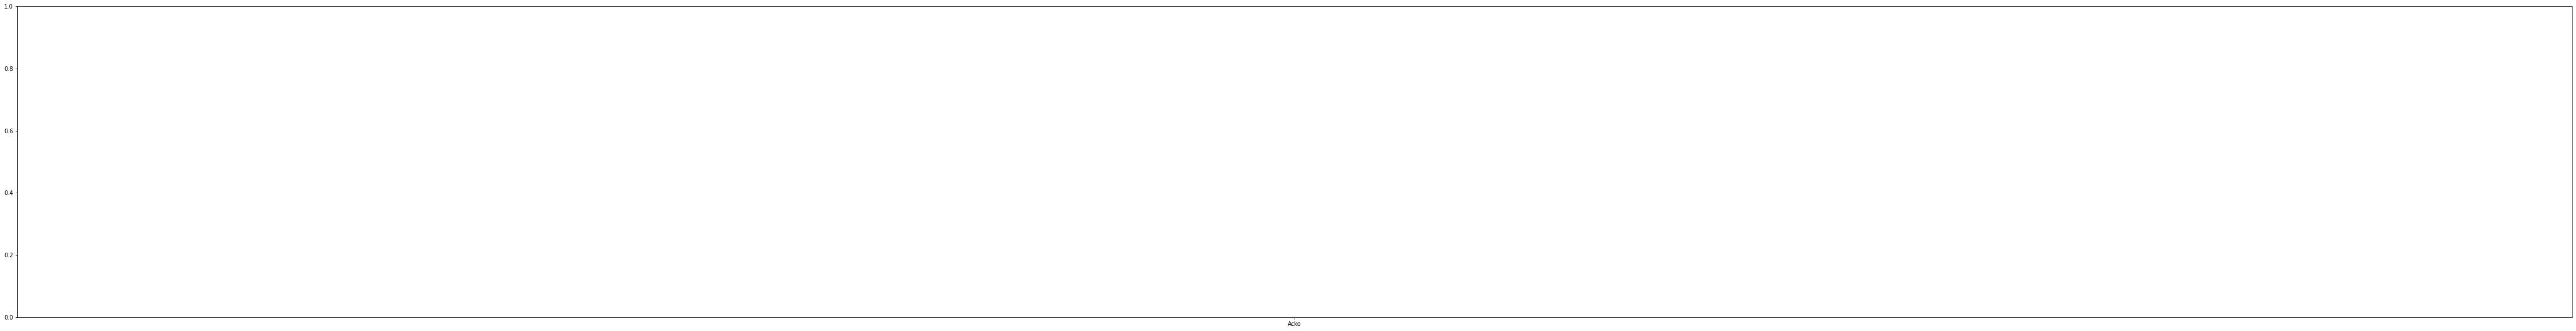

In [ ]:
# Bar Plot
import matplotlib.pyplot as plt
plt.figure(figsize=(80,10))
plt.bar(x = df.Unicorns , height =  df.valuation, width=0.5, color='purple')
plt.show()

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


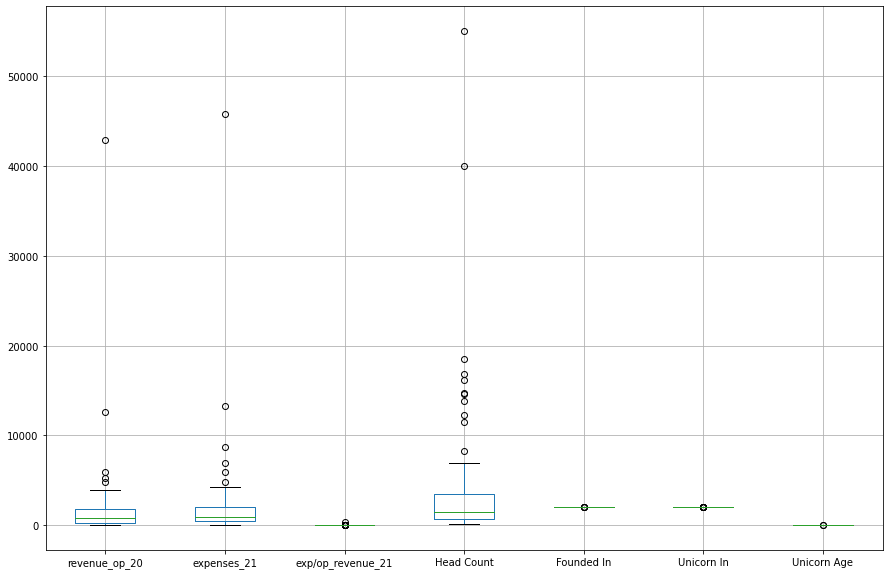

In [ ]:
### Box Plot (Detect Outliers)
boxplot = df.boxplot(figsize = (15,10))

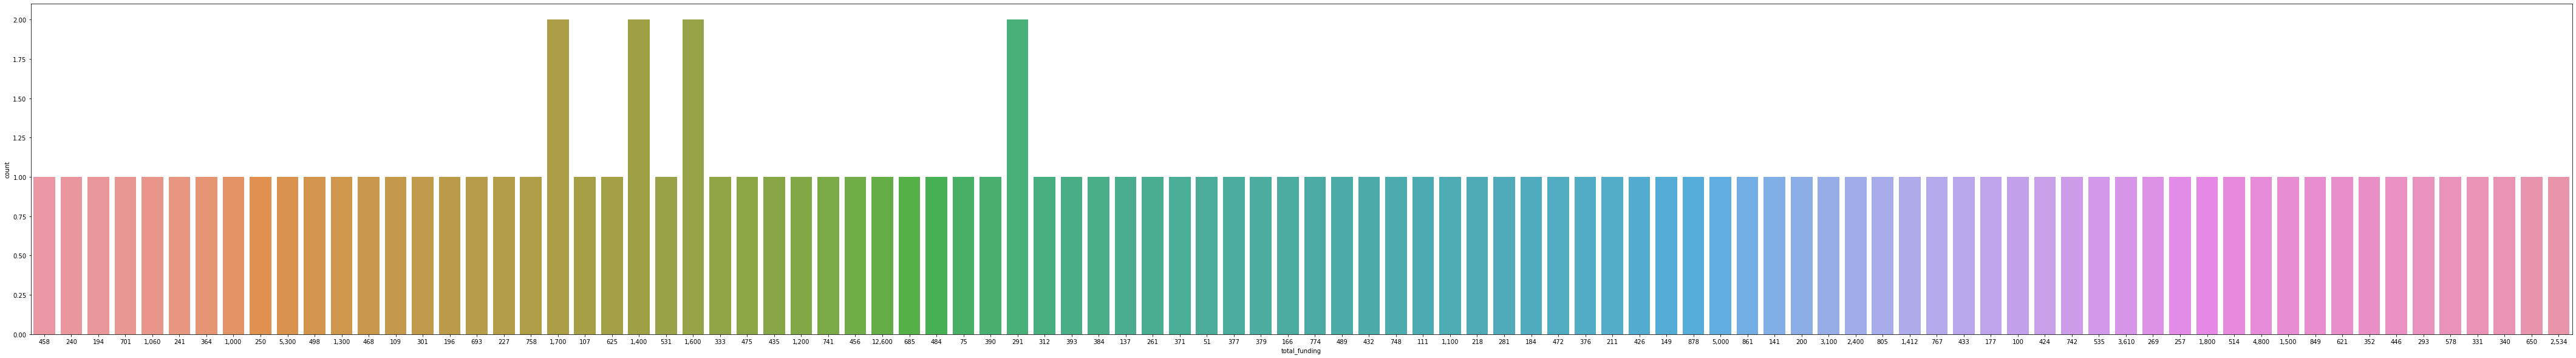

In [ ]:
### Count Plot (count the categorical data)
plt.figure(figsize=(75,10))
sns.countplot(x= df.total_funding)
plt.show()

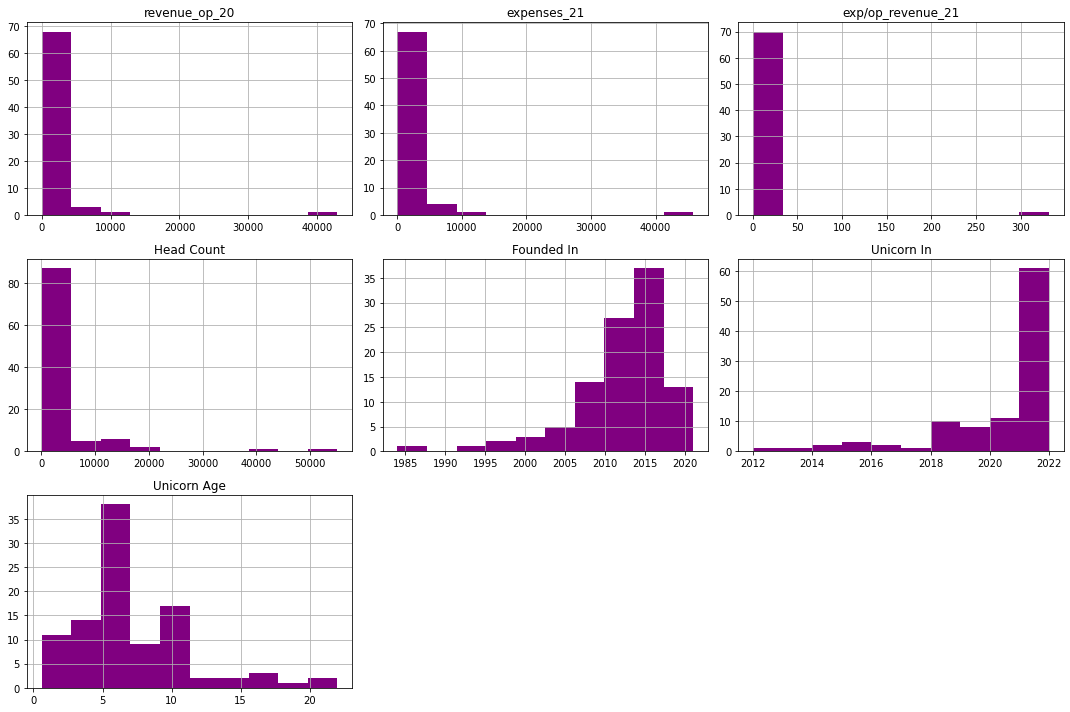

In [ ]:
# Values of different columns of dataset
df.hist(bins=10, figsize=(15, 10), color="purple")
plt.tight_layout()

# New Section

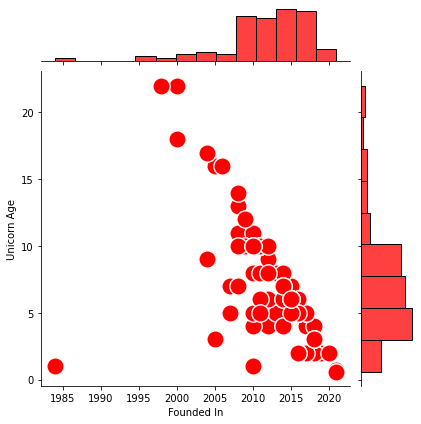

In [ ]:
# Jointplot (Scatter Plot + Histogram)
sns.jointplot(x='Founded In',y='Unicorn Age',data= df ,s=300,color='red')

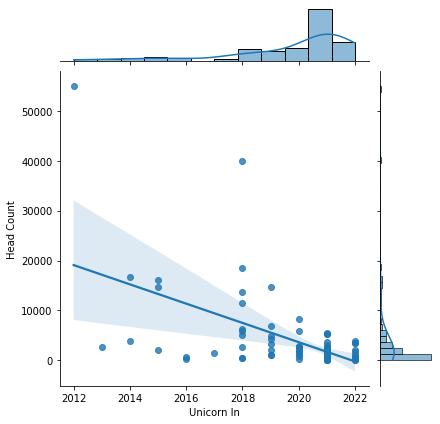

In [ ]:
sns.jointplot(x='Unicorn In',y='Head Count',kind='reg',data=df)
plt.show()

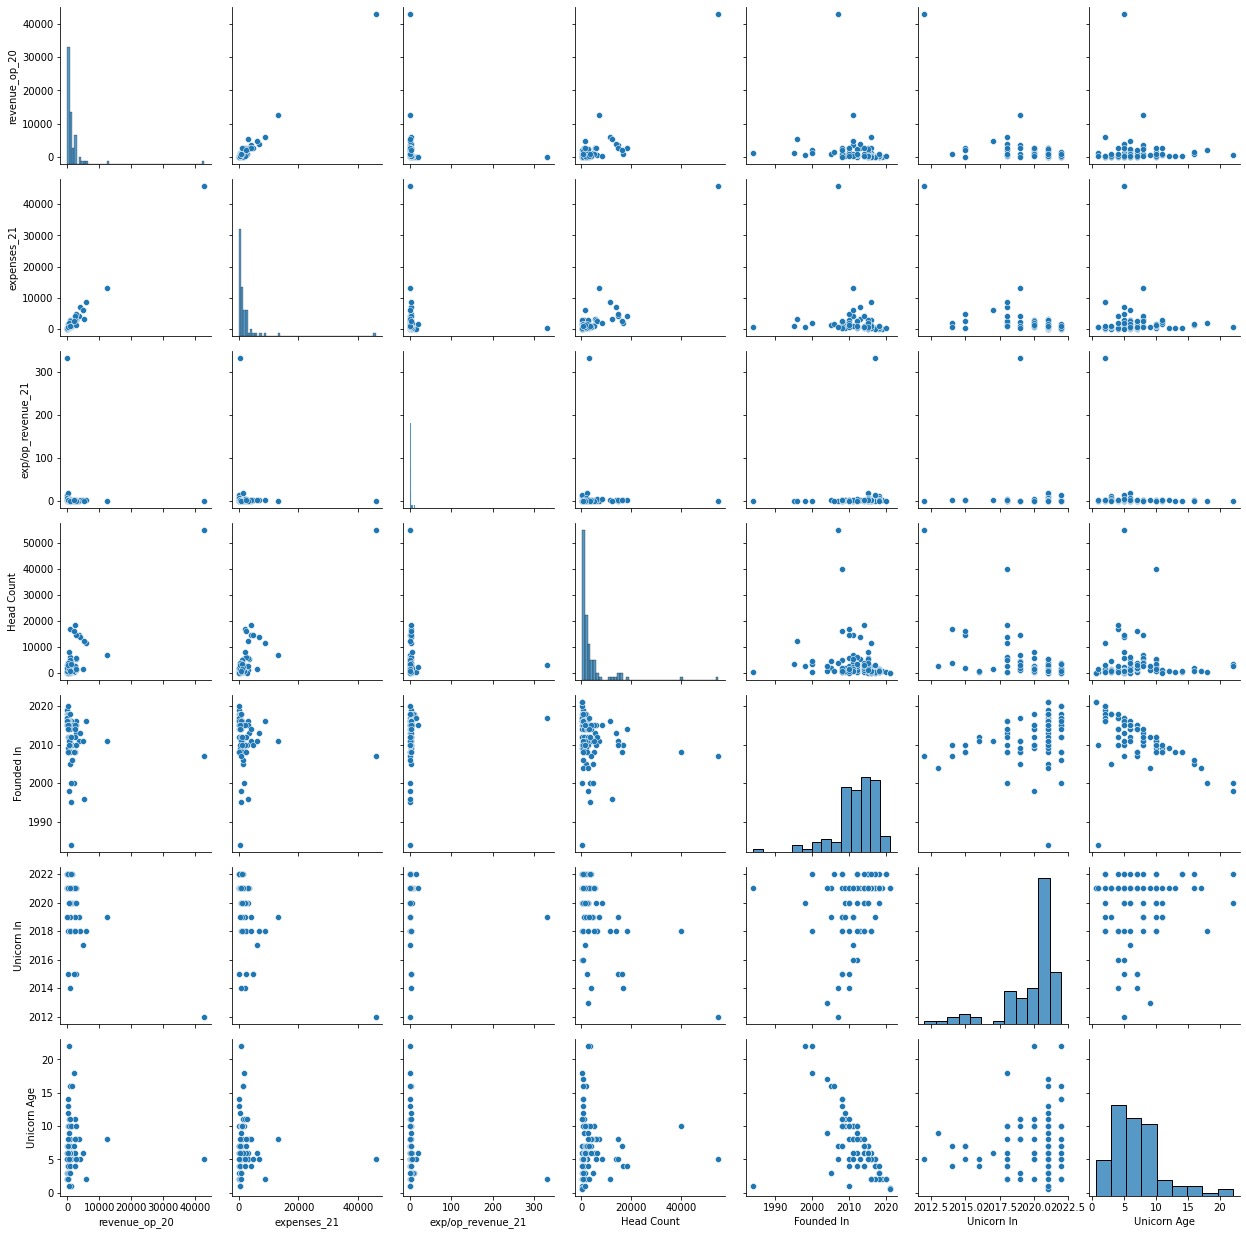

In [ ]:
### Multivariate
a = sns.PairGrid(df)
a.map_diag(sns.histplot)
a.map_offdiag(sns.scatterplot)
plt.show()

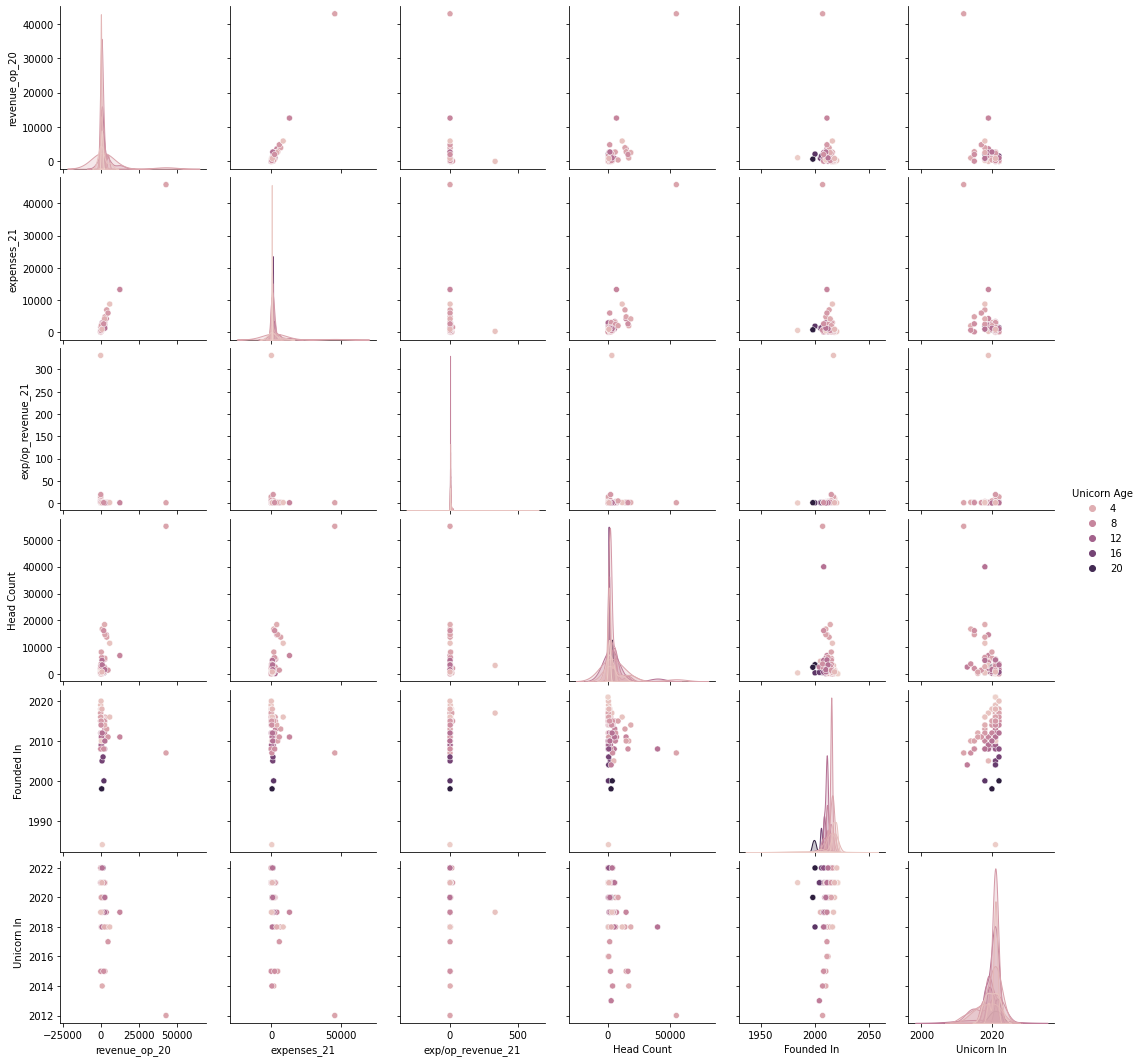

In [ ]:
sns.pairplot(df,hue='Unicorn Age')
plt.show()

In [ ]:
df.mean()

<ipython-input-27-c61f0c8f89b5>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.mean()


revenue_op_20        1849.755616
expenses_21          2220.769452
exp/op_revenue_21       6.935634
Head Count           3848.774510
Founded In           2011.844660
Unicorn In           2019.960000
Unicorn Age             7.083838
dtype: float64